In [1]:
from impala.dbapi import connect
conn = connect(host='awscdpdw001', port=21050)
from impala.util import as_pandas
cur = conn.cursor()

cur.execute('select count(*) as NumberOfUsers, airlinesentiment, airline from airlinesentimentkudu group by airlinesentiment, airline')
df = as_pandas(cur)

df.head()


,numberofusers,airlinesentiment,airline
0,13132,Neutral,Cloud Air
1,56320,Positive,Cloud Air
2,20249,Negative,Cloud Air


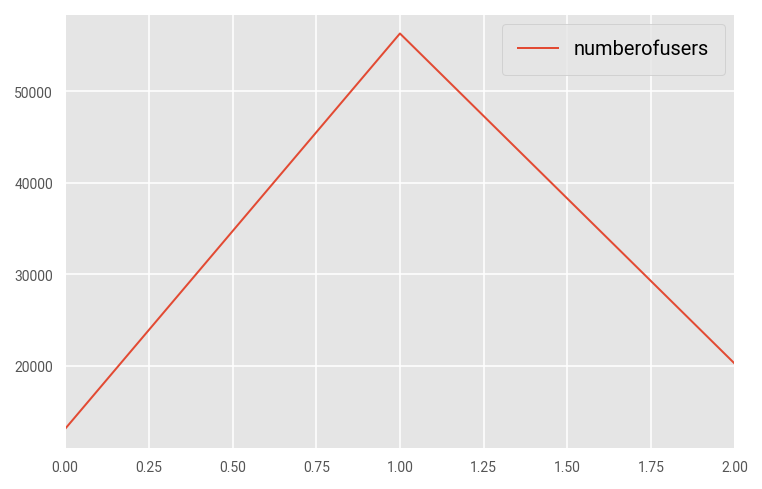

In [2]:

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

df.plot()

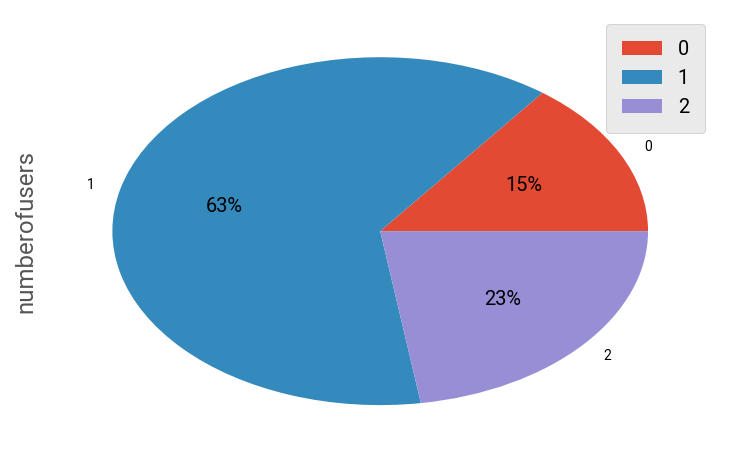

In [5]:

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

df.plot(kind='pie', autopct='%1.0f%%', x='airlinesentiment', y='numberofusers')

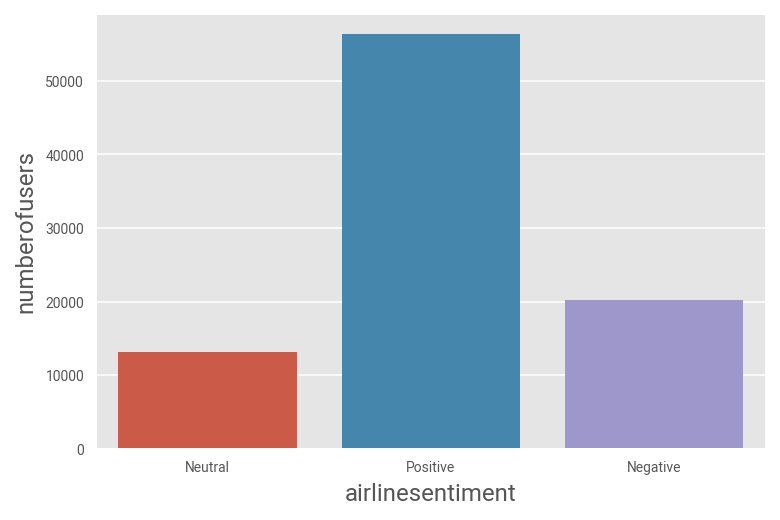

In [6]:
import seaborn as sns

sns.barplot(x='airlinesentiment', y='numberofusers' , data=df)

In [8]:
import plotly.express as px

px.bar(df,              # our dataframe
       x="airlinesentiment",         # x will be the 'key' column of the dataframe
       y="numberofusers",   # y will be the 'doc_count' column of the dataframe
       title=f"Sentime for Airline on Twitter",
       labels={"tweets_count": "# tweets","key": "sentiment"}, # the axis names
       color_discrete_sequence=["orange"],
       height=500,       width=800)